In [32]:
import pandas as pd
import numpy as np

In [33]:
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
teste = pd.read_csv('test.csv')

In [38]:
teste

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,31,MG,17,F,2,1,2,0,3,...,120.0,620.0,B,E,D,B,B,A,NaN,D
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,35,SP,20,F,1,1,1,2,1,...,20.0,320.0,A,B,B,A,A,C,NaN,B
4567,3f1c3388244df8d6521e983a809292d9f3bca643,11,RO,22,F,3,1,1,5,1,...,60.0,500.0,D,E,E,B,A,B,E,A
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,35,SP,19,M,1,1,2,0,2,...,80.0,520.0,H,D,B,B,B,A,NaN,A


In [39]:
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [40]:
treino = pd.read_csv('train.csv')

In [41]:
treino.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [42]:
treino.drop(columns = ['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'CO_UF_NASCIMENTO','Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009','Q010', 'Q011', 'Q012','Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027', 'Q028', 'Q029', 'Q030', 'Q031', 'Q039','Q032', 'Q033', 'Q034', 'Q035', 'Q036', 'Q037', 'Q038', 'Q040', 'Q049','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_GABARITO_MT','TX_GABARITO_LC', 'TX_GABARITO_CH', 'TX_GABARITO_CN', 'Unnamed: 0', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'TP_ESTADO_CIVIL', 'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q050'], inplace = True)

In [43]:
treino['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [44]:
treino.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
       'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_MACA', 'I

In [45]:
aux = treino[['IN_TREINEIRO', 'NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']]

In [46]:
aux.isnull().sum()

IN_TREINEIRO          0
NU_IDADE              0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

In [47]:
aux.fillna(0, inplace = True)

C:\Users\natas\Anaconda3\envs\aceleracao\lib\site-packages\pandas\core\frame.py:4252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [48]:
aux.isnull().sum()

IN_TREINEIRO       0
NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ANO_CONCLUIU    0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [49]:
aux.head(30)

,IN_TREINEIRO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,0,24,1,4,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,0,17,2,0,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,0,21,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,25,1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,28,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,18,1,1,439.7,583.2,410.9,364.5,120.0,120.0,120.0,160.0,100.0,620.0
6,0,18,2,0,420.1,604.2,484.5,529.2,100.0,120.0,120.0,120.0,100.0,560.0
7,0,18,1,1,619.6,625.8,611.2,566.7,140.0,120.0,120.0,120.0,120.0,620.0
8,0,16,2,0,500.5,555.2,521.8,372.4,140.0,160.0,140.0,140.0,100.0,680.0
9,0,24,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y = aux['IN_TREINEIRO']
X = aux[['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']]

In [51]:
X

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU
0,24,1,4
1,17,2,0
2,21,3,0
3,25,1,9
4,28,1,4
...,...,...,...
13725,20,1,3
13726,33,1,10
13727,15,3,0
13728,36,4,0


In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
13725    0
13726    0
13727    1
13728    0
13729    0
Name: IN_TREINEIRO, Length: 13730, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [54]:
X_train.shape

(9611, 3)

In [55]:
X_test.shape

(4119, 3)

In [56]:
y_train.shape

(9611,)

In [57]:
classifier = RandomForestClassifier(n_estimators = 2)

In [58]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [59]:
pred = classifier.predict(X_test)

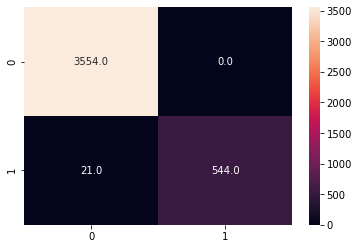

In [60]:
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '.1f')

In [61]:
pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [63]:
teste['NU_IDADE'].value_counts()

17    876
18    766
19    499
16    341
20    341
21    246
22    218
23    168
24    116
25    102
26     82
29     71
15     71
28     69
27     66
30     56
31     54
32     47
33     43
36     37
34     35
35     34
38     26
37     26
40     21
39     21
42     15
44     15
41     14
43     12
51     10
47      9
45      9
49      9
46      9
50      8
48      7
54      5
52      5
14      4
56      1
60      1
53      1
57      1
55      1
58      1
63      1
Name: NU_IDADE, dtype: int64

In [64]:
teste_aux = teste[['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']]
teste_aux.shape

(4570, 3)

In [66]:
predt = classifier.predict(teste_aux)

In [69]:
inscricao = teste['NU_INSCRICAO']
inscricao.shape

(4570,)

In [70]:
p = pd.DataFrame(predt)

In [74]:
resposta = pd.concat([inscricao,p],axis=1 )
resposta.rename(columns = {0: 'IN_TREINEIRO'}, inplace = True)

In [75]:
resposta.to_csv('answer.csv')